# Regression

Basics of linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats         # Doesn't get auto-imporeted if you just do scipy

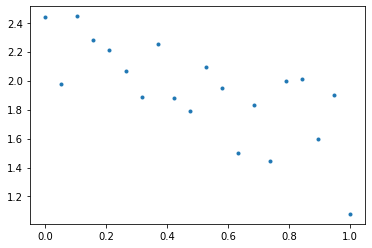

In [2]:
# Generate data
np.random.seed(2)
n = 20
x = np.linspace(0, 1, n)
y = 2 - x + np.random.rand(n)
plt.plot(x, y, '.');

If $y = ax + ε$ where $ε \perp x$ then multiplying by $x$ at both sides we get $yx = axx$, and thus $a = yx/xx$.

2.612526141936812


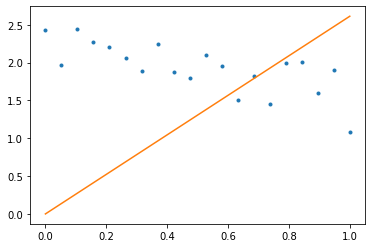

In [4]:
# Closed form, with zero intercept

th = (y @ x)/(x @ x)
print(th)

plt.plot(x, y, '.');
plt.plot(x, th*x, '-');

But $y=ax$ isn't too expressive of course; when we think about linear regression, we actually mean $y=ax+b$. Which is strictly speaking fitting with a 2D basis: $y_1 = const$ and $y_2 = x$.

One way to deal with it is to manually remove the constants. Another way is to embrace the 2D.

-0.7817904334978574


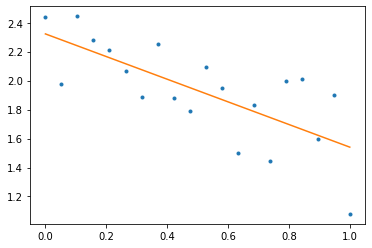

In [5]:
# Closed form, with manually fit inrecept
# (equivalent to manual Gram-Smidt elimination)

th0 = np.mean(y)
yhat = y - th0
xhat = x - np.mean(x)
th = (yhat @ xhat)/(xhat @ xhat)
print(th)

plt.plot(x, y, '.');
plt.plot(x, th0 + th*xhat, '-');

(20, 2)
[-0.78179043  2.32242713]


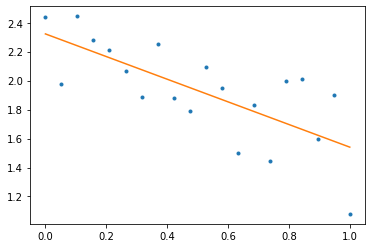

In [11]:
# Closed form, with inrecept fit 2D-style (matrices)
# At this point we can no longer use the "/" operator, as it would do some sort of elementwise
# division. We need either inv (inverse) or pinv (pseudo-inverse).

xhat = np.vstack((x, np.ones(x.shape))).T
print(xhat.shape)
th = (xhat.T @ y) @ np.linalg.inv(xhat.T @ xhat)
print(th)

plt.plot(x, y, '.');
plt.plot(x, xhat @ th, '-');

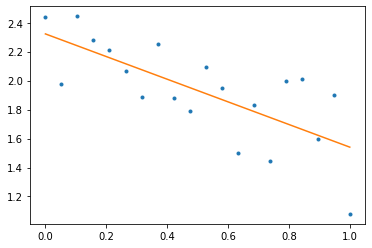

In [133]:
# Scipy linar regression

r = stats.linregress(x, y)
plt.plot(x, y, '.');
plt.plot(x, r.intercept + r.slope*x, '-');

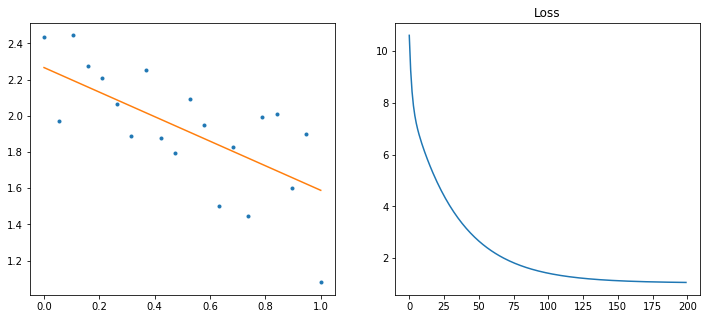

In [145]:
# Naive manual gradient descent

a = 1
b = 1
alpha = 0.01
nsteps = 200
loss = np.zeros(nsteps)
for i in range(nsteps):
    h = a*x + b
    loss[i] = np.sum(np.square(y-h))
    eb = np.sum(h-y)
    ea = ((h-y) @ x)
    b -= alpha*eb
    a -= alpha*ea
    
# Plots
plt.figure(figsize=(12,5));
plt.subplot(1,2,1);
plt.plot(x, y, '.');
plt.plot(x, a*x + b, '-');
plt.subplot(1,2,2);
plt.plot(loss);
plt.title('Loss');